http://web.stanford.edu/class/cs168/p7.pdf

In [1]:
import csv
import math

parks = []

with open('data/p7/parks.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        parks.append({
            'name': row[0],
            'lat': float(row[1]),
            'lon': float(row[2])
        })

dists = []
for p1 in parks:
    row = []
    for p2 in parks:
        row.append(math.sqrt((p1['lat'] - p2['lat']) ** 2 + (p1['lon'] - p2['lon']) ** 2))
    dists.append(row)

In [2]:
import numpy as np
import random

MAXITER = 10000

def pathcost(route):
    s = 0
    for i in range(len(parks)):
        nxt = (i + 1) % len(parks)
        s += dists[route[i]][route[nxt]]
    return s

defroute = []
for i in range(len(parks)):
    defroute.append(i)
# Sanity check
assert abs(pathcost(defroute) - 491.92) < 0.1

def mcmc(t, successive_switch):
    route = np.random.permutation(len(parks))
    best = route
    cost = pathcost(route)
    bestcost = cost
    costs = [cost]
    for _ in range(MAXITER):        
        pos = random.randrange(len(parks))
        if successive_switch:
            nxt = (pos + 1) % len(parks)
        else:
            nxt = (pos + random.randrange(len(parks) - 1)) % len(parks)
        
        newroute = route.copy()
        newroute[pos] = route[nxt]
        newroute[nxt] = route[pos]
        
        newcost = pathcost(newroute)
        
        if newcost < cost:
            route = newroute
            cost = newcost
        elif t > 0 and random.uniform(0, 1) < math.exp((cost - newcost) / t):
            route = newroute
            cost = newcost
        if newcost < bestcost:
            bestcost = newcost
            best = route
        costs.append(cost)
    return costs

In [3]:
NUMTRIALS = 10
TS = [0, 1, 10, 100]

successive_costs = []
for t in TS:
    row = []
    for trial in range(NUMTRIALS):
        row.append(mcmc(t, True))
    successive_costs.append(row)

non_successive_costs = []
for t in TS:
    row = []
    for trial in range(NUMTRIALS):
        row.append(mcmc(t, False))
    non_successive_costs.append(row)

In [4]:
import matplotlib.pyplot as plt

def do_plot(costs):
    xs = np.arange(0, MAXITER + 1)

    for i in range(len(TS)):
        fig, ax1 = plt.subplots()
        fig.set_size_inches(18.5, 10.5)

        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Cost')
        ax1.set_title(f"T={TS[i]}")

        for j in range(NUMTRIALS):
            ax1.plot(xs, costs[i][j])

    plt.show()
    plt.close()

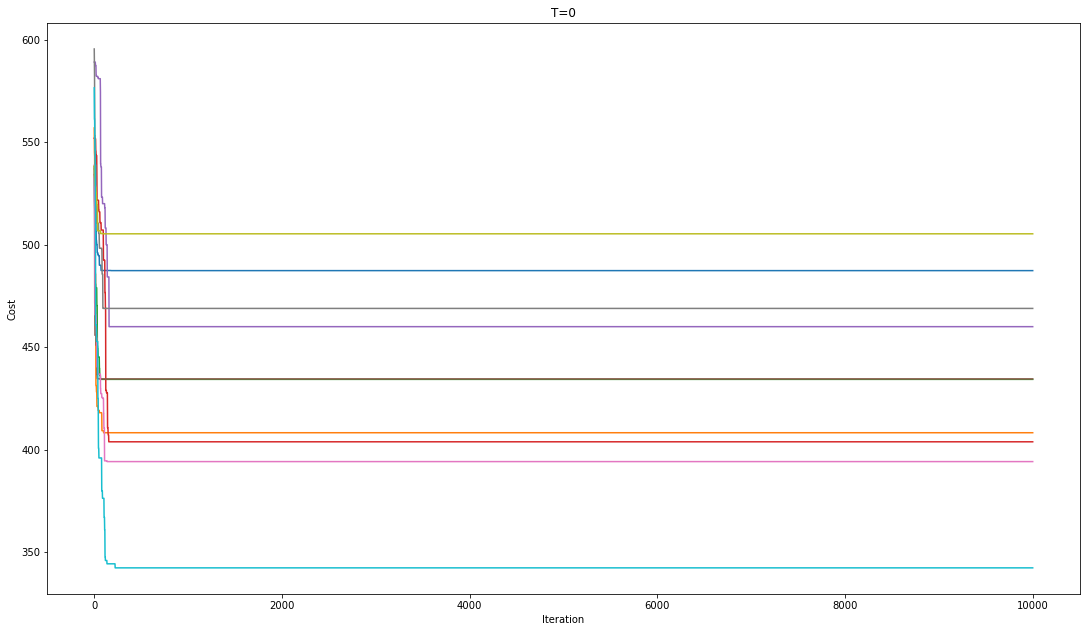

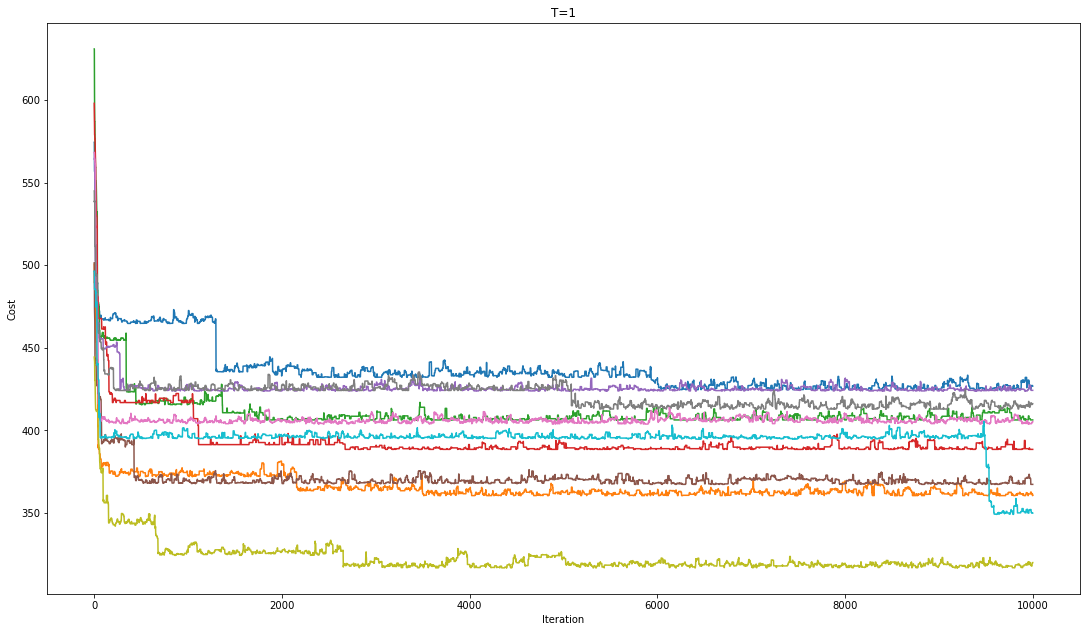

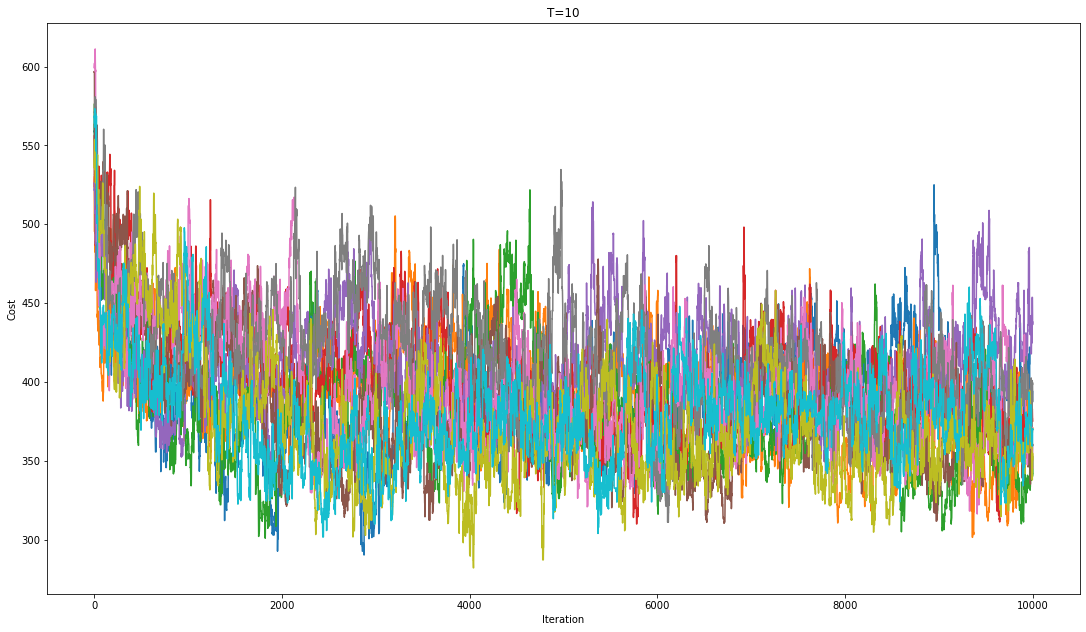

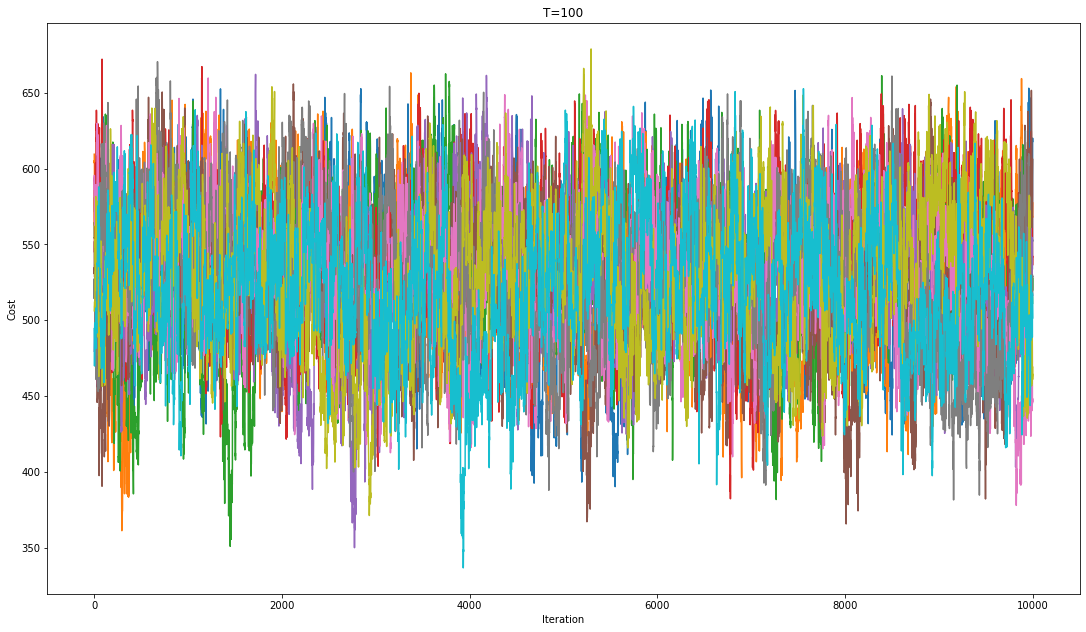

In [5]:
do_plot(successive_costs)

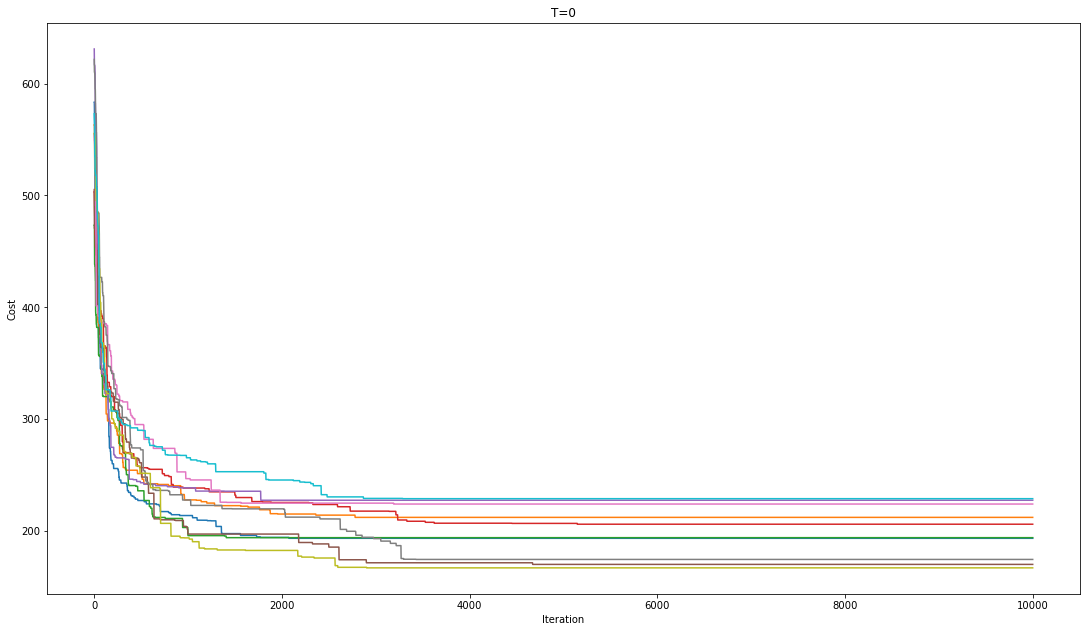

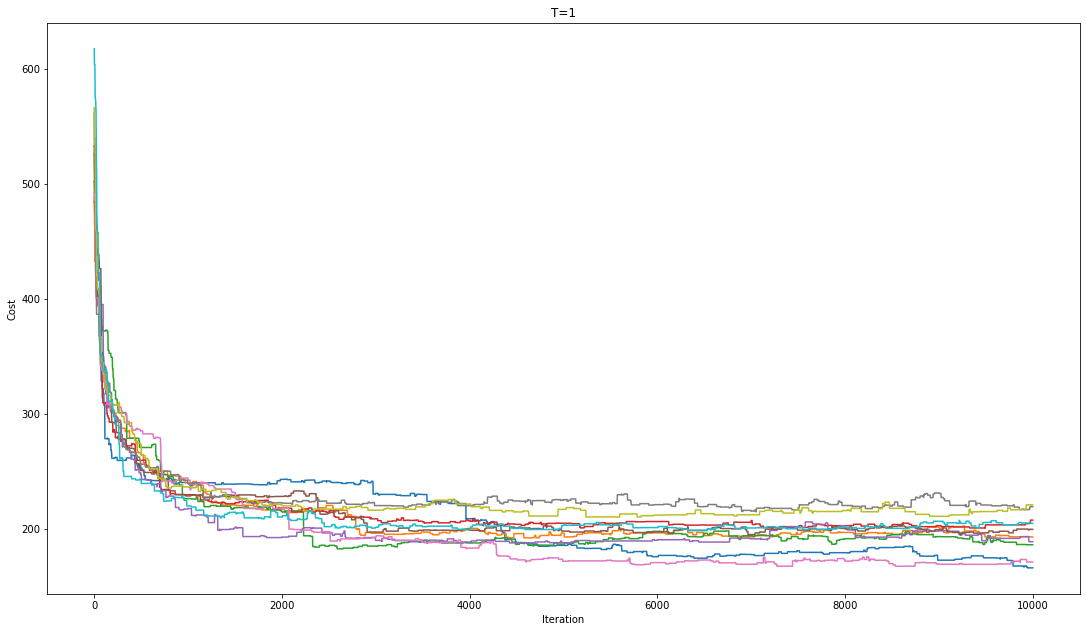

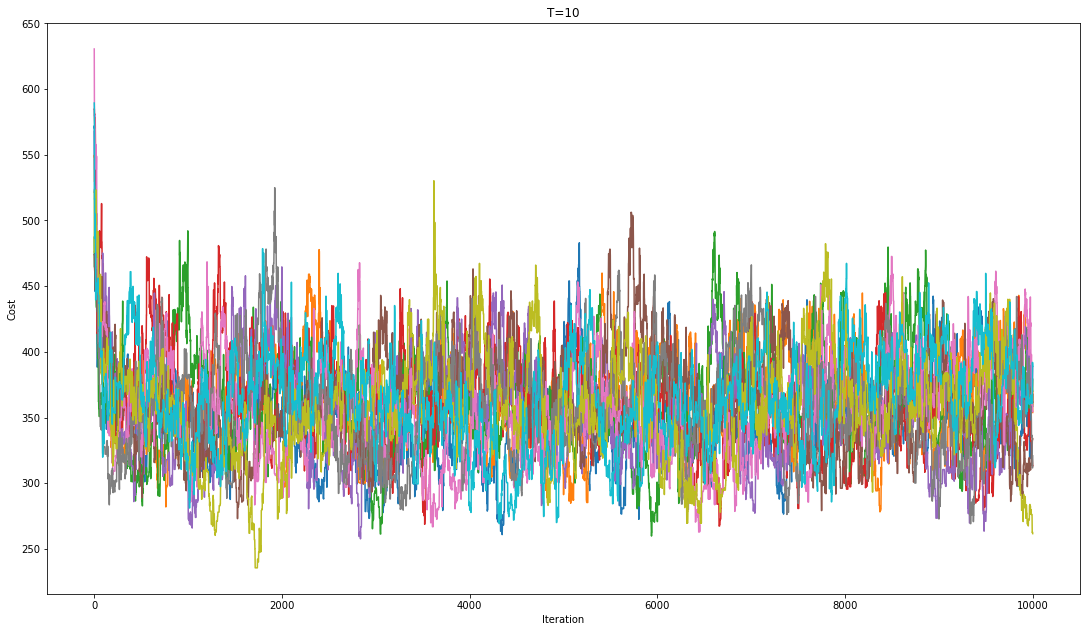

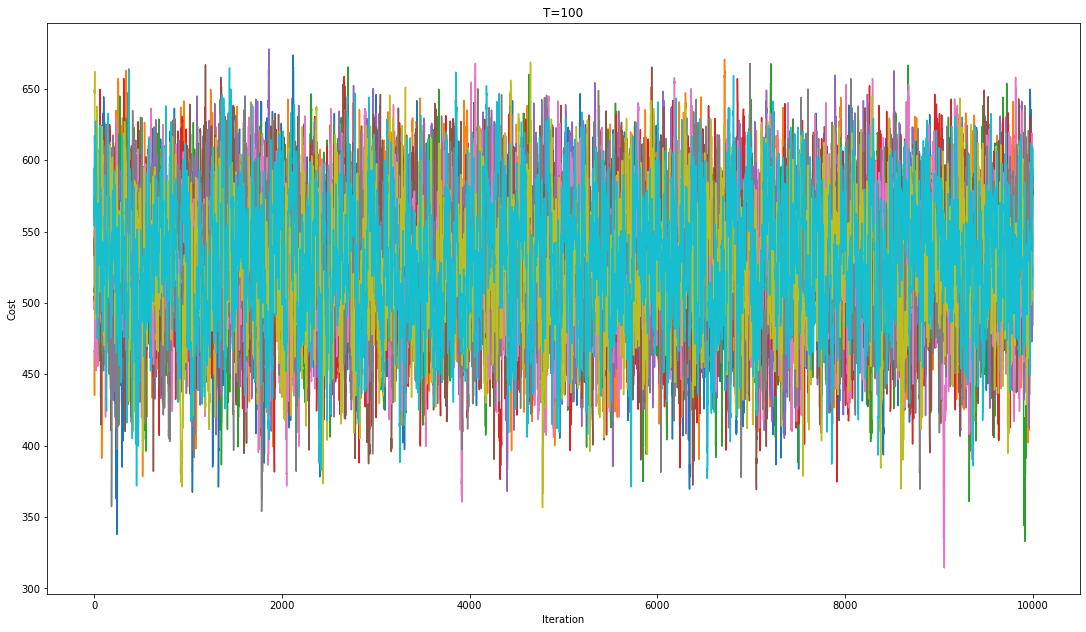

In [6]:
do_plot(non_successive_costs)